<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [33]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

try:
    # Attempt to fetch data using scikit-learn's built-in function
    data = fetch_california_housing(as_frame=True)
    X = data.data
    y = data.target
    print("California Housing data loaded using fetch_california_housing.")
except Exception as e:
    print(f"Could not fetch California Housing data directly: {e}. Trying alternative download from CSV.")
    # Fallback to a direct CSV download from a common public source
    california_housing_url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    housing_df = pd.read_csv(california_housing_url)

    # Prepare X (features) and y (target) from the downloaded CSV
    X = housing_df.drop('median_house_value', axis=1)
    y = housing_df['median_house_value']

    # Handle potential missing values (e.g., 'total_bedrooms' in this dataset)
    # by filling with the median, a common practice.
    if X.isnull().sum().any():
        # Only calculate median for numeric columns to avoid TypeError on 'ocean_proximity'
        X = X.fillna(X.median(numeric_only=True))

    print("California Housing data loaded from alternative URL.")

X.head()

/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


Could not fetch California Housing data directly: HTTP Error 403: Forbidden. Trying alternative download from CSV.
California Housing data loaded from alternative URL.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [34]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [35]:
X = pd.get_dummies(X,columns=["ocean_proximity"], drop_first=True)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [36]:
#model

gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
    )
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test,y_pred)
print(f"R-squared: {r2}")
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 3118957448.7116747
R-squared: 0.7642899959476849
Mean Absolute Error: 38468.41999232767


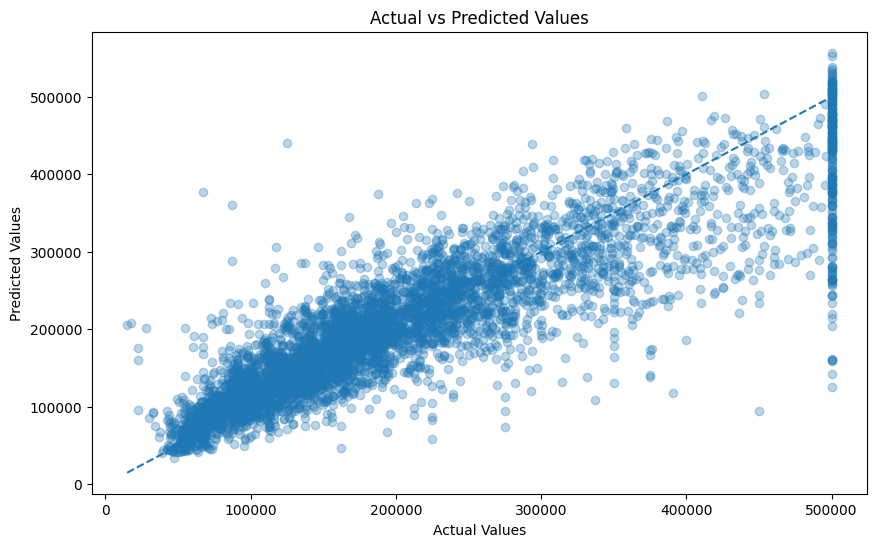

In [38]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.3)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [39]:
#Effect of Learning Rate
learning_rates =[0.01,0.05,0.1,0.2,0.8]
results =[]
for ls in learning_rates:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=ls,
      max_depth=3,
      random_state=42
  )
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  results.append((ls,r2_score(y_test,preds)))
pd.DataFrame(results,columns=["learning Rate","R2 Score"])

,learning Rate,R2 Score
0,0.01,0.512381
1,0.05,0.712286
2,0.10,0.764290
3,0.20,0.790553
4,0.80,0.793534


In [40]:
#Effect of Learning Rate
depths =[1,2,3,4,7]
results =[]
for dep in depths:
  model = GradientBoostingRegressor(
      n_estimators=100,
      learning_rate=0.1,
      max_depth=dep,
      random_state=42
  )
  model.fit(X_train,y_train)
  preds = model.predict(X_test)
  results.append((dep,r2_score(y_test,preds)))
pd.DataFrame(results,columns=["Max_Depth","R2 Score"])

,Max_Depth,R2 Score
0,1,0.625080
1,2,0.722297
2,3,0.764290
3,4,0.796955
4,7,0.826803


In [42]:
feature_importance = gbr.feature_importances_

importance_df = pd.Series(
    feature_importance, index=X.columns
).sort_values(ascending=False)

importance_df.head(10)

,0
median_income,0.582599
ocean_proximity_INLAND,0.168774
longitude,0.089882
latitude,0.048823
housing_median_age,0.041662
population,0.027672
total_bedrooms,0.021178
ocean_proximity_NEAR OCEAN,0.007271
households,0.004558
ocean_proximity_NEAR BAY,0.004496
